In [8]:
!pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 MB 2.0 MB/s eta 0:00:0000:0100:01
  Using cached setuptools-65.3.0-py3-none-any.whl (1.2 MB)


  Attempting uninstall: setuptools
    Found existing installation: setuptools 47.1.0
    Uninstalling setuptools-47.1.0:
      Successfully uninstalled setuptools-47.1.0
You should consider upgrading via the '/root/venv/bin/python3.7 -m pip install --upgrade pip' command.


In [44]:
!/data/20220719_183951/package_10/point_cloud.ply"
# data_path = "/data/20220719_183951/package_10"
# scp root@45.138.163.137:/root/data/20220719_183951/package_10/point_cloud.ply ./

/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [18]:
import open3d as o3d
import plotly

In [29]:
!env

LC_ALL=C.UTF-8
LD_LIBRARY_PATH=/usr/local/cuda-10.0/targets/x86_64-linux/lib:/usr/local/cuda-10.1/targets/x86_64-linux/lib:/usr/local/cuda-10.2/targets/x86_64-linux/lib:/opt/nvidia/nsight-systems/2020.3.4/target-linux-x64/libcupti.so.10.0:/usr/local/cuda-10.1/extras/CUPTI/lib64/:/usr/local/cuda-11.0/targets/x86_64-linux/lib
LS_COLORS=rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do=01;35:bd=40;33;01:cd=40;33;01:or=40;31;01:mi=00:su=37;41:sg=30;43:ca=30;41:tw=30;42:ow=34;42:st=37;44:ex=01;32:*.tar=01;31:*.tgz=01;31:*.arc=01;31:*.arj=01;31:*.taz=01;31:*.lha=01;31:*.lz4=01;31:*.lzh=01;31:*.lzma=01;31:*.tlz=01;31:*.txz=01;31:*.tzo=01;31:*.t7z=01;31:*.zip=01;31:*.z=01;31:*.Z=01;31:*.dz=01;31:*.gz=01;31:*.lrz=01;31:*.lz=01;31:*.lzo=01;31:*.xz=01;31:*.zst=01;31:*.tzst=01;31:*.bz2=01;31:*.bz=01;31:*.tbz=01;31:*.tbz2=01;31:*.tz=01;31:*.deb=01;31:*.rpm=01;31:*.jar=01;31:*.war=01;31:*.ear=01;31:*.sar=01;31:*.rar=01;31:*.alz=01;31:*.ace=01;31:*.zoo=01;31:*.cpio=01;31:*.7z=01;31:*.rz=01;31:*.cab=0

In [14]:
#not works, X11 forwarding disabled in ssh, need setting!
def show_cloud(filepath: str):
    pcd = o3d.io.read_point_cloud(filepath)
    o3d.visualization.draw_geometries([pcd])

In [37]:
# show_cloud("./data/20220719_183951/package_10/point_cloud.ply")

[Open3D WARNING] GLFW Error: X11: Failed to open display "192.168.92.204:0.0"
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [1]:
#./data/20220719_183951/package_0/meta.txt
#./data/20220719_183951/package_0/point_cloud.ply

In [76]:
!cd data && ls

20220719_183951  20220720_104238  20220724_154038  20220724_171831


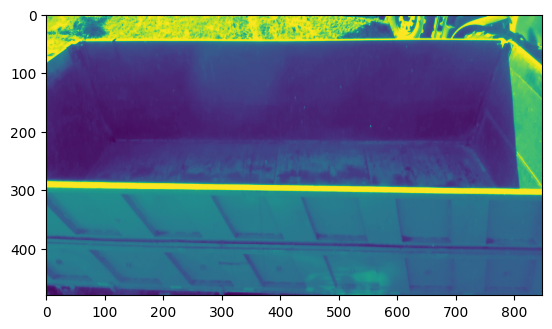

In [79]:
import cv2
plt.imshow(cv2.imread("./data/20220724_171831/package_0/color_frame.png", 0))

***Кроме основного подхода с сегментацией и разбиением изображения по маскам мы также используем предоставленные облака точек, в частности делаем проекцию 3D облака точек с того же вида камеры, как в обычных снимках, для генерации дополнительных масок для подстраховки основного алгоритма.***  
***В деталях, мы собираем внутренние и внешние данные камеры из текстовых файлов с метаинформацией, рендерим облако точек на обьемной сцене и поворачиваем камеру на необходимый угол, чтобы получить правильную проекцию.***

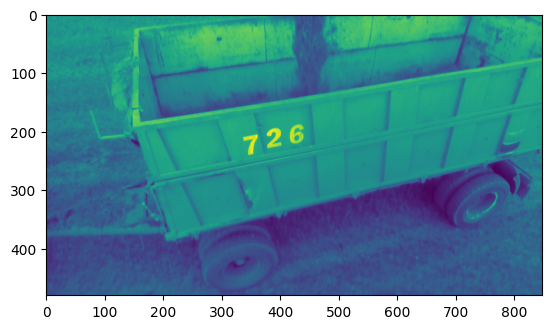

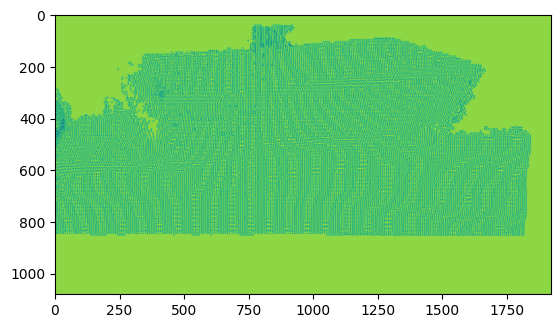

In [136]:
import numpy as np
import open3d as o3d
import json
import cv2
import matplotlib.pyplot as plt

package_path = "./data/20220719_183951/package_160/"

# Read .ply file
with open(f"{package_path}meta.txt", "r") as f:
    metadata = json.loads(f.read())
    
input_file = f"{package_path}point_cloud.ply"
pcd = o3d.io.read_point_cloud(input_file) # Read the point cloud
# o3d.visualization.draw_geometries([pcd]) 

intr = o3d.camera.PinholeCameraIntrinsic(1024, 768, metadata["intrinsics"]["fx"], metadata["intrinsics"]["fy"], metadata["intrinsics"]["ppx"], metadata["intrinsics"]["ppy"])
cam = o3d.camera.PinholeCameraParameters()
cam.intrinsic = intr

# renderer.setup_camera(cam.intrinsic, cam.extrinsic)
# depth_img = renderer.render_to_depth_image()
# o3d.io.write_image("depth.jpg", depth_img)
# control = get_view_control()
# control.convert_from_pinhole_camera_parameters(cam, True)
#yaw pitch roll - look from above 0, 500

#pitch yaw roll
#pitch roll yaw
#roll pitch yaw
#roll yaw pitch
#yaw roll pitch
R = pcd.get_rotation_matrix_from_xyz((0,0,np.pi / 2))
# R = pcd.get_rotation_matrix_from_xyz((metadata['yaw_rad'], metadata['pitch_rad'], metadata['roll_rad']))
cam.extrinsic = np.array([[*R[0], 0], [*R[1], 0.0], [*R[2], 0.], [0., 0., 0., 1.]])
pcd.rotate(R, center = (0,0,0))

# Visualize the point cloud within open3d
# o3d.visualization.draw_geometries([pcd]) 
# render = o3d.visualization.Visualizer()
# render.create_window()
# model, mat = getModel()
# control = render.get_view_control()
# render.add_geometry(pcd) 
# control.convert_from_pinhole_camera_parameters(cam, True)
# render.update_geometry(pcd) 
# render.setup_camera(cam.intrinsic, cam.extrinsic)
# render.run()

offscreen = o3d.visualization.rendering.OffscreenRenderer(1920, 1080)
# pcd = o3d.t.geometry.PointCloud( o3d.core.Device("CPU:0")).append(pcd)
mat = o3d.visualization.rendering.MaterialRecord()
# offscreen.scene.set_background([0, 0, 0, 0])
offscreen.scene.set_lighting(offscreen.scene.LightingProfile.NO_SHADOWS, (0, 0, 0))
offscreen.scene.add_geometry("cloud", pcd, mat)
offscreen.setup_camera(cam.intrinsic, cam.extrinsic)
offscreen.scene.camera.look_at([0,0,0], [-0.1,0,-1], [1,0,0])
depth_img = offscreen.render_to_image()
# print(depth_img)
o3d.io.write_image("depth.jpg", depth_img, quality=9)
img = np.array(depth_img)
# cv2.imshow("model", img)
# cv2.waitKey(1)
# depth_img = renderer.render_to_depth_image()
# o3d.visualization.draw_geometries([depth_img])
fig = plt.figure()
plt.imshow(cv2.imread(f"{package_path}color_frame.png", 0))
fig = plt.figure()
cv_img = cv2.imread("depth.jpg", 0)
plt.imshow(cv_img)

# Convert open3d format to numpy array
# Here, you have the point cloud in numpy format. 
point_cloud_in_numpy = np.asarray(pcd.points) 

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# x, y, z = point_cloud_in_numpy[:, 0], point_cloud_in_numpy[:, 1], point_cloud_in_numpy[:, 2]
# ax.scatter(x,y,z)
# plt.show()